<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-proyecto-equipo-132/blob/main/Actividad_Semana_4_Eq132.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos (Gpo 10)**
###Tecnológico de Monterrey
###Prof titular: Jobish Vallikavungal Devassia 
###Prof tutor: Julio César Galindo López    

###Alumno: Luis Fernando Rios Piedra A00453954
###Alumno: David Eduardo Garcia Reyes A01086411

### **Semana 4**
###Módulo 3 (Parte 2) - Transformación y Reducción de datosación
###**Realizar reducción de datos en Python con PCA

In [12]:
import pandas as pd
import numpy as np

In [13]:
# URL con la base de datos que paso por el proceso de limpieza en la actividad anterior
path='https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-132/main/crd_client_clean_132.csv'

In [14]:
#Lectura de base de datos en el dataframe "df"
df = pd.read_csv(path)
df.index.name = None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,-1.0,-1.0,-1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,220000,1.0,3.0,1.0,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29954,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29955,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29956,80000,1.0,3.0,1.0,41.0,1.0,-1.0,-1.0,-1.0,-1.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [15]:
# Attribute Information:

# This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
# X2: Gender (1 = male; 2 = female). 
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
# X4: Marital status (1 = married; 2 = single; 3 = others). 
# X5: Age (year). 
# X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
# X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
# X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [16]:
#Cambianos nombre de variables de entrada/columnas para tener una mejor relación y entendimiento sobre los datos que estamos manejando
df.rename(columns = {"X1":"Credit","X2":"Gender","X3":"Education","X4":"Maritial_Status","X5":"Age","X6":"RPSep_05","X7":"RPAug_05","X8":"RPJul_05","X9":"RPJun_05","X10":"RPMay_05","X11":"RPApr_05","X12":"BSSep_05","X13":"BSAug_05","X14":"BSJul_05","X15":"BSJun_05","X16":"BSMay_05","X17":"BSApr_05","X18":"PPSep_05","X19":"PPAug-05","X20":"PPJul-05","X21":"PPJun-05","X22":"PPMay-05","X23":"PPApr-05"},inplace = True)


In [17]:
#Desplegar estadísticos sobre los datos
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Credit,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
Gender,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
Education,29958.0,1.840810,0.743317,1.0,1.00,2.0,2.00,4.0
Maritial_Status,29958.0,1.553542,0.518304,1.0,1.00,2.0,2.00,3.0
Age,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
RPSep_05,29958.0,-0.416316,1.142539,-1.0,-1.00,-1.0,-1.00,8.0
RPAug_05,29958.0,-0.532279,1.146252,-1.0,-1.00,-1.0,-1.00,8.0
RPJul_05,29958.0,-0.555978,1.125108,-1.0,-1.00,-1.0,-1.00,8.0
RPJun_05,29958.0,-0.624608,1.066540,-1.0,-1.00,-1.0,-1.00,8.0
RPMay_05,29958.0,-0.680186,1.000431,-1.0,-1.00,-1.0,-1.00,8.0


In [18]:
# La base de datos cuenta con 29,958 registros sin datos nulos y cada uno con 23 variables de entrada X y una variable de salida Y.
#X1 es variable numérica
#X2-X4 variables categóricas
#X5 variable numérica
#X6-X11 variables categóricas
#X18-X23 variables numéricas
#Y variable de respuesta categórica
df.shape

(29958, 24)

In [19]:
df=df.drop(columns=['Gender','Education','Maritial_Status',"RPSep_05","RPAug_05","RPJul_05","RPJun_05","RPMay_05","RPApr_05",'Y'])

In [20]:
#Reviasmos correlación entre todas las variables numéricas dentro del data set
#Se aprecia que las variables BS*** muestran valores de correlación más altos comparados con las otras variables
df.corr()

,Credit,Age,BSSep_05,BSAug_05,BSJul_05,BSJun_05,BSMay_05,BSApr_05,PPSep_05,PPAug-05,PPJul-05,PPJun-05,PPMay-05,PPApr-05
Credit,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
Age,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
BSSep_05,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
BSAug_05,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
BSJul_05,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
BSJun_05,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
BSMay_05,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
BSApr_05,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
PPSep_05,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
PPAug-05,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


# PASO 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

In [21]:
# Llamando librerias de procesamiendo del PCA y normalización
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [22]:
#Llamando librerias para graficar
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
#Se realiza operación de procesamiendo de PCA y escalamiendo al set de datos
pcs=PCA()
pcs.fit(preprocessing.scale(df))

PCA()

In [24]:
#Creación de dataframe con resumen de cálculos de PCA
summary={'Standard deviation':np.sqrt(pcs.explained_variance_),
         'Proportion of variance':pcs.explained_variance_ratio_,
         'Cumulative proportion':np.cumsum(pcs.explained_variance_ratio_)
}
summary
pcsSummary=pd.DataFrame(summary).transpose()
pcsSummary=pcsSummary.round(3)
pcsSummary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,2.433,1.310,1.022,0.962,0.940,0.934,0.883,0.852,0.841,0.514,0.266,0.203,0.159,0.152
Proportion of variance,0.423,0.123,0.075,0.066,0.063,0.062,0.056,0.052,0.051,0.019,0.005,0.003,0.002,0.002
Cumulative proportion,0.423,0.545,0.620,0.686,0.749,0.812,0.867,0.919,0.970,0.989,0.994,0.997,0.998,1.000


In [25]:
#Operación para renombrar columnas como componentes PC**
pcsSummary.columns=['PC{}'.format(i) for i in range(1,len(pcsSummary.columns)+1) ]
pcsSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.433,1.310,1.022,0.962,0.940,0.934,0.883,0.852,0.841,0.514,0.266,0.203,0.159,0.152
Proportion of variance,0.423,0.123,0.075,0.066,0.063,0.062,0.056,0.052,0.051,0.019,0.005,0.003,0.002,0.002
Cumulative proportion,0.423,0.545,0.620,0.686,0.749,0.812,0.867,0.919,0.970,0.989,0.994,0.997,0.998,1.000


In [26]:
#Generar arreglo con componentes "x" para graficar Scree
pc_components= np.arange(pcs.n_components_)+1
pc_components


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [27]:
#Generar valores de salida "y" para graficar Scree
cumsum= np.cumsum(pcs.explained_variance_ratio_)
var_ratio=pcs.explained_variance_ratio_

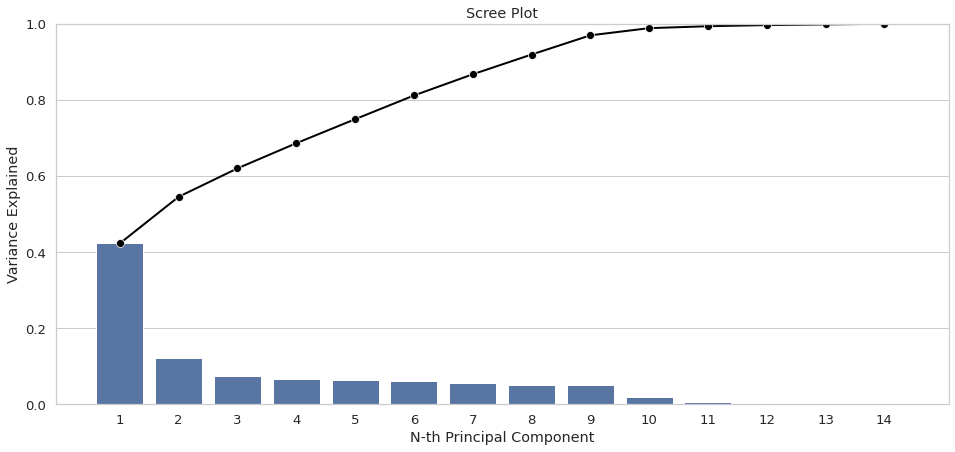

In [28]:
#Operación para generar gráfica Scree
scree=sns.set(style='whitegrid',font_scale=1.2)
fig,ax= plt.subplots(figsize=(16,7))
scre=e=sns.barplot(x=pc_components,
                   y=var_ratio,
                   color='b'
                   )
scree=sns.lineplot(x=pc_components-1,
                    y=cumsum,
                    color='black',
                    linestyle='-',
                    linewidth=2,
                    marker='o',
                    markersize=8
    
)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [29]:
#Valor de proporción de varianza acumulada entre PC1 a PC9
pcsSummary.iloc[2,8]*100

97.0

In [30]:
#Generar dataframe resultado de la reducción con PCA que captura el 97% de la variación 
pcs_comp_df=pd.DataFrame(pcs.components_.transpose(),
                       columns=pcsSummary.columns,
                       index=df.columns
)
PCA_red_res=pcs_comp_df.iloc[:,:9]


# PASO 2: Interprete cada componente principal en términos de las variables originales





In [31]:
PCA_red_res.PC1.nlargest(3)

BSJun_05    0.391557
BSMay_05    0.388505
BSJul_05    0.388264
Name: PC1, dtype: float64

**Para PC1 el saldo de corte de Mayo Junio y Julio (BS- bill statement) son las variables reales de mayor contribución.**

In [32]:
PCA_red_res.PC2.nlargest(3)

PPAug-05    0.408391
PPJul-05    0.392339
PPSep_05    0.383194
Name: PC2, dtype: float64

**Para PC2 el historial de pagos de Julio, Agosto, Septiembre (PP- previous payment) son las variables reales de mayor contribución.**

In [33]:
PCA_red_res.PC3.nlargest(3)

PPAug-05    0.200925
PPSep_05    0.173845
PPJul-05    0.122065
Name: PC3, dtype: float64

**Para PC3 el saldo de corte de Mayo Junio y Julio (BS- bill statement) son las variables realeas con mayor contribución.**

In [34]:
PCA_red_res.PC4.nlargest(3)

PPSep_05    0.362055
PPAug-05    0.345745
Age         0.338990
Name: PC4, dtype: float64

**Para PC4 el historial de pagos de Agosto, Septiembre y la edad  son las variables realeas con mayor contribución.**

In [35]:
PCA_red_res.PC5.nlargest(3)

PPApr-05    0.659155
PPSep_05    0.225652
PPAug-05    0.148714
Name: PC5, dtype: float64

**Para PC5 el historial de pagos de Abril, Agosto y Septiembre son las variables realeas con mayor contribución.**

In [36]:
PCA_red_res.PC6.nlargest(3)

PPMay-05    0.602388
PPAug-05    0.408361
BSJul_05    0.099239
Name: PC6, dtype: float64

**Para PC6 el historial de pagos de Mayo, Agosto y  el saldo de corte de Julio son las variables realeas con mayor contribución.**

In [37]:
PCA_red_res.PC7.nlargest(3)

PPJul-05    0.785216
BSJun_05    0.126494
Credit      0.111239
Name: PC7, dtype: float64

**Para PC7 el pago de Julio, el saldo de corte de Junio y la cantidad de crédito otorgado son las variables reales con mayor contribución**

In [38]:
PCA_red_res.PC8.nlargest(3)

PPAug-05    0.578491
PPApr-05    0.181276
BSJul_05    0.093077
Name: PC8, dtype: float64

**Para PC8 el historial de pagos de Abril, Agosto y el saldo de corte de Julio son las variables reales de mayor contribución.**

In [39]:
PCA_red_res.PC9.nlargest(3)

Age         0.330346
PPApr-05    0.316686
PPMay-05    0.252920
Name: PC9, dtype: float64

**Para PC9 la edad y el historial de pagos de Abril y Mayo son las variables reales de mayor contribución.**

**Del análisis anterior se puede determinar que si usara este data set para construir un modelo de predicciones las variables que más contribuyen están relacionadas con el saldo de corte y el historial de pagos de meses consecutivos**

# PASO 3: Identifique valores atípicos

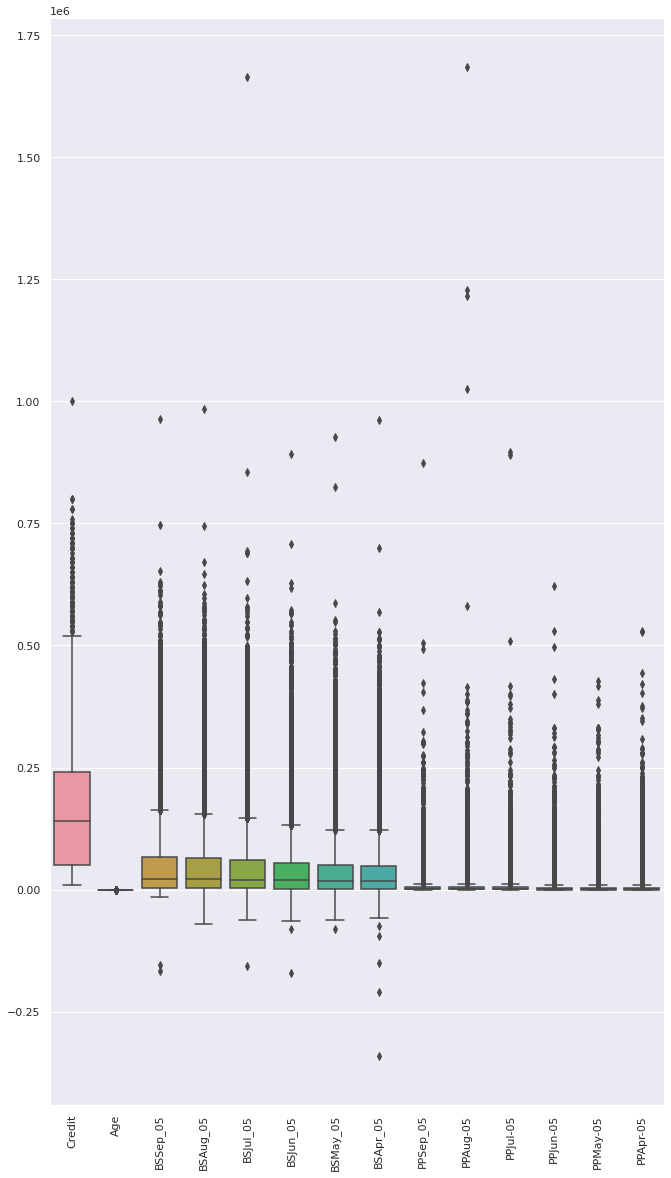

In [40]:
sns.set(rc={'figure.figsize':(11,20)})
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

**NOTA SOBRE EL BOXPLOT: En este caso el Boxplot no ayuda a determinar de manera eficaz e intuitiva cuales son los valores átipicos dentro del data set. Como se puede observar hay demasiados valores fuera de los límites superiores. Lo indicado sería tener una variable de "salida" de tipo numérico con la cual hacer comparativo usando las variables que muestran mayor correlación. ***


1. ¿Cuál es el número de componentes mínimo y por qué?

**R. Como se puede apreciar en el gráfico Scree PC1,PC2 y PC3 tienen la mayor contribución de ahí en aldelante de PC4 a PC9 la propoción de cada uno esta entre 0.06 y 0.05 por lo que también deben ser tomadas en cuenta. A partir de PC10 la proporción se reduce a menos de 0.02. Si elegimos la componentes de PC1 a PC9 estamos tomando en cuenta el 97% de la contribución, lo cual lo hace los suficientemente extensivo para trabajar con un buen modelo.  ***


2. ¿Cuál es la variación de los datos que representan esos componentes?

**R. De acuerdo al cálculo de PCA la variación atribuida a las componentes PC1 a PC9 es del 97%. ***

3. ¿Cuál es la pérdida de información después de realizar PCA?

**R. Al reducir el numero de dimensiones de un total de 14 componentes numéricas a 9 componentes, solo tenemos una pérdida de información del 3%.***

4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

**R. Las variables originales relacionadas con saldo de corte ( que etiquetamos como "BS") y las variables originales relacionadas con pagos anteriores/historial de pagos (que etiquetamos coomo "PS"). ***

5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

**R. PCA se recomienda cuando la mayoría de las variables dentro de un set de datos son numéricas y es una herramienta eficaz para identificar las variables que tienen mayor contribución y eliminar las que tengan baja contribución que al final se traduce en un modelo más sencillo de procesar con Machine Learning ***